# WEBSCRAPING
Web scraping is the process of extracting and parsing data from websites in an automated fashion using a computer program. It's a useful technique for creating datasets for research and learning. While web scraping often involves parsing and processing HTML documents, some platforms also offer REST APIs to retrieve information in a machine-readable format like JSON.

## STEPS INVOVLED IN IT
Here are the steps we'll follow:

 1. We're going to scrape https://github.com/topics
 2. We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
 3. For each topic, we'll get the top 25 repositories in the topic from the topic page
 4. For each repository, we'll grab the repo name, username, stars and repo URL
 5. For each topic we'll create a CSV file in the following format:
     - Repo Name,Username,Stars,Repo URL
     - three.js,mrdoob,69700,https://github.com/mrdoob/three.js
     - libgdx,libgdx,18300,https://github.com/libgdx/libgdx

## General Procedure for any webscraping
1. Pick a website and describe your objective
- Browse through different sites and pick on to scrape.
- Identify the information you'd like to scrape from the site. Decide the format of the output CSV file.

2. Use the requests library to download web pages
- Inspect the website's HTML source and identify the right URLs to download.
- Download and save web pages locally using the requests library.
- Create a function to automate downloading for different topics/search queries

3. Use Beautiful Soup to parse and extract information
- Parse and explore the structure of downloaded web pages using Beautiful soup.
- Use the right properties and methods to extract the required information.
- Create functions to extract from the page into lists and dictionaries.

4. Create CSV file(s) with the extracted information
- Create functions for the end-to-end process of downloading, parsing, and saving CSVs.
- Execute the function with different inputs to create a dataset of CSV files.
- Verify the information in the CSV files by reading them back using Pandas.

## STEP_1
Python function that creates a CSV file (comma-separated values) containing details about the 25 top GitHub repositories for any given topic.We are going to scrape the github page.
link-https://github.com/topics

# STEP_2

- When you access a URL like https://github.com/topics/machine-learning using a web browser, it downloads the contents of the web page the URL points to and displays the output on the screen. Before we can extract information from a web page, we need to download the page using Python.

- We'll use a library called requests to download web pages from the internet.

In [3]:
import requests
#We can download a web page using the requests.get function.

In [21]:
topic_url = 'https://github.com/topics/machine-learning'
response_url = requests.get(topic_url)
type(response)

requests.models.Response

In [22]:
response_url.status_code
#The contents of the web page can be accessed using the .text property of the response.

200

In [23]:
page_contents_url=response_url.text

In [24]:
len(page_contents_url)

670891

In [25]:
page_contents_url[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-E9wnWjoxQmh5A1jiWVYDPKOvA8VPf0iKQYoc+9ycMJvtAi9gOSlaUci+W2smxFIlWkV8hkX+O27S8NIB59iIDw==" rel="stylesheet" href="https://github.githubassets.com/assets/light-13dc275a3a314268790358e25956033c.css" /><link crossorigin="anonymous" media="all" integrity="sha512-nYSv3KrFhMlGUpjkFQBLMEN6HvHhijcoubQLjV3DWlcABEi2yDYf6KGUjRubJ5R+dJnKXR7jA4wu5Dg2

Let's save the contents to a file with the .html extension.

In [26]:
with open('Machine_learning.html','w',encoding='utf-8') as file:
    file.write(page_contents_url)

You can now view the file using the "File > Open" menu option within Jupyter and clicking on machine-learning.html in the list of files displayed. Here's what you'll see when you open the file:

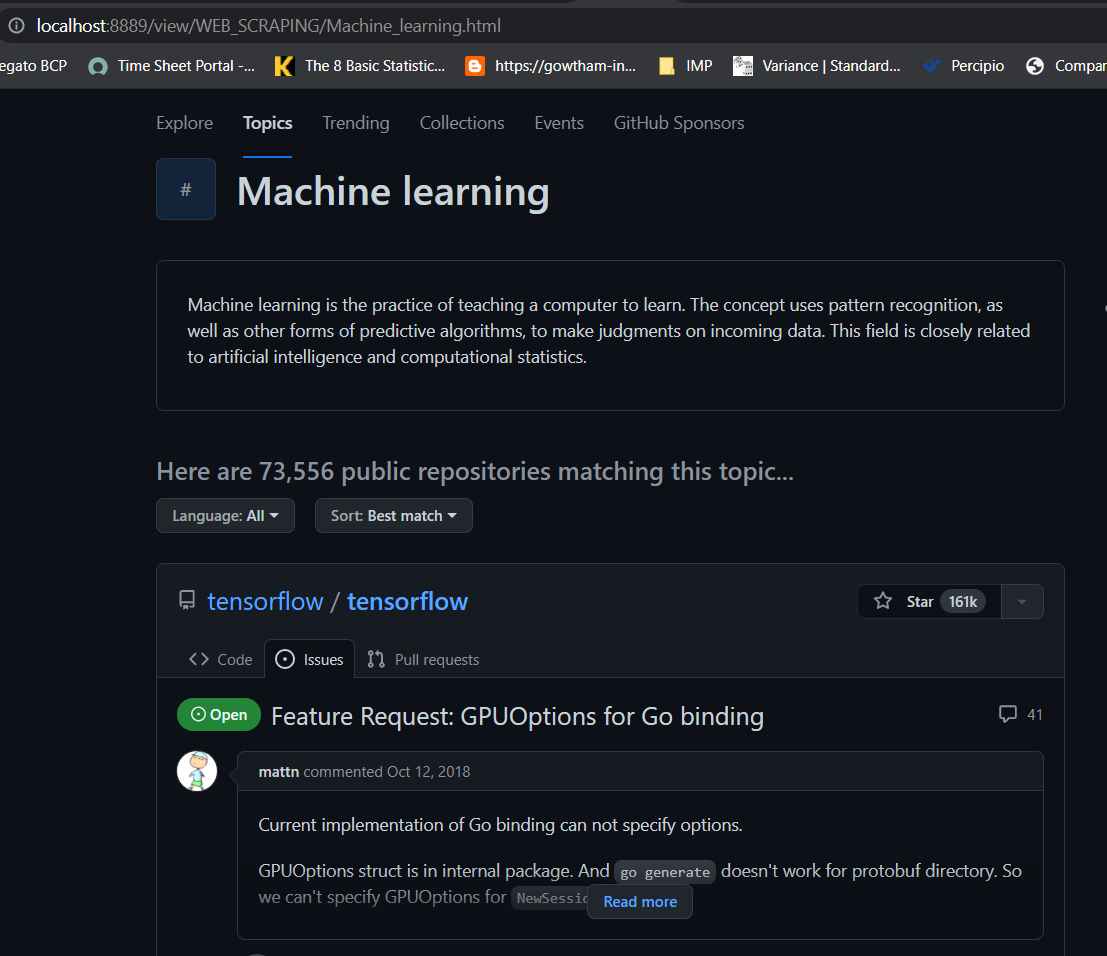

While this looks similar to the original web page, note that it's simply a copy. You will notice that none of the links or buttons work. 

In [18]:
topic_url='https://github.com/topics'
response=requests.get(topic_url)

In [20]:
response  #if response is in between 200-299 then it is sucess else it is false

<Response [200]>

In [28]:
page_contents=response.text

In [29]:
with open('topics.html','w',encoding='utf-8') as f:
    f.write(page_contents)

In [39]:
len(page_contents)

174358

In [44]:
page_contents[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-E9wnWjoxQmh5A1jiWVYDPKOvA8VPf0iKQYoc+9ycMJvtAi9gOSlaUci+W2smxFIlWkV8hkX+O27S8NIB59iIDw==" rel="stylesheet" href="https://github.githubassets.com/assets/light-13dc275a3a314268790358e25956033c.css" /><link crossorigin="anonymous" media="all" integrity="sha512-nYSv3KrFhMlGUpjkFQBLMEN6HvHhijcoubQLjV3DWlcABEi2yDYf6KGUjRubJ5R+dJnKXR7jA4wu5Dg2

## Step_3:Use Beautiful soup and extract information
### Inspecting HTML in the Browser
You can view the source code of any webpage right within your browser by right-clicking anywhere on a page and selecting the "Inspect" option. It opens the "Developer Tools" pane, where you can see the source code as a tree. You can expand and collapse various nodes and find the source code for a specific portion of the page.

In [17]:
from bs4 import BeautifulSoup #importing the beautiful soup library

In [45]:
doc=BeautifulSoup(page_contents,'html.parser') #you need to pass the html content and the html.parser.

In [47]:
type(doc)

bs4.BeautifulSoup

In [51]:
Title_tag=doc.find('title')

In [52]:
#To extract text from the html we need to use the text method.Lets use text method on Title_tag.
Title_tag.text

'Topics on GitHub · GitHub'

### Extract topics using Tags

In [66]:
topic_title_tags=doc.find_all('p',class_='f3 lh-condensed mb-0 mt-1 Link--primary')


In [67]:
len(topic_title_tags)


30

In [68]:
topic_title_tags[:5]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>]

In [69]:
topic_desc_tags=doc.find_all('p',class_="f5 color-fg-muted mb-0 mt-1")


In [70]:
len(topic_desc_tags)

30

In [71]:
topic_desc_tags[:5]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D modeling is the process of virtually developing the surface and structure of a 3D object.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency framework for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>]

In [89]:
topic_link_tags=doc.find_all('a',class_="no-underline flex-grow-0")


In [114]:
topic_link_tags[1]

<a class="no-underline flex-grow-0" href="/topics/ajax">
<img alt="ajax" class="rounded mr-3" height="64" src="https://raw.githubusercontent.com/github/explore/8be26d91eb231fec0b8856359979ac09f27173fd/topics/ajax/ajax.png" width="64"/>
</a>

In [101]:
topic_link_tags[1]['href']

'/topics/ajax'

In [133]:
#now we will make it to link
topic0_url='https://github.com/'+topic_link_tags[0]['href']


In [134]:
print(topic0_url)

https://github.com//topics/3d


In [135]:
topic_titles=[]
for tags in topic_title_tags:
    topic_titles.append(tags.text)
topic_titles[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

In [136]:
topic_description=[]
for tags in topic_desc_tags:
    topic_description.append(tags.text.strip())#strip removes spaces from string
topic_description[:5]

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency framework for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

we do have text method only for tags.Href is attribute.Its not a tag.To get attributes use indexing

In [140]:
topic_urls=[]
base_url='https://github.com'
for tags in topic_link_tags:
    topic_urls.append(base_url+tags['href'])
topic_urls[:5]

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android']

In [141]:
import pandas as pd

In [142]:
topics_dict={
    'title':topic_titles,
    'descrption':topic_description,
    'url':topic_urls
}
topics_df=pd.DataFrame(topics_dict)

In [143]:
topics_df.sample(5)

,title,descrption,url
12,Amazon Web Services,Amazon Web Services provides on-demand cloud c...,https://github.com/topics/aws
23,Clojure,"Clojure is a dynamic, general-purpose programm...",https://github.com/topics/clojure
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
27,Continuous integration,Automatically build and test your code as you ...,https://github.com/topics/continuous-integration
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d


## Getting information out of a Topic Page

In [341]:
topic_page_url='https://github.com/topics/aws'

In [342]:
response=requests.get(topic_page_url)

In [343]:
response.status_code

200

In [344]:
len(response.text)

693629

In [345]:
topic_doc=BeautifulSoup(response.text,'html.parser')

In [346]:
repo_tags=topic_doc.find_all('h3',class_="f3 color-fg-muted text-normal lh-condensed")
len(repo_tags)


30

In [347]:
a_tags=repo_tags[0].find_all('a')
a_tags

[<a data-ga-click="Explore, go to repository owner, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":13742415,"originating_url":"https://github.com/topics/aws","user_id":null}}' data-hydro-click-hmac="d9e308e369d2b4c48a1d8c6bedf3b2c792abe0a9d49c84a0ebdb97dfa30d6072" data-view-component="true" href="/serverless">
             serverless
 </a>,
 <a class="text-bold wb-break-word" data-ga-click="Explore, go to repository, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":34302698,"originating_url":"https://github.com/topics/aws","user_id":null}}' data-hydro-click-hmac="8026a90c8409d7d4c55e3963d610c3eee104c23e00104f9edb80e1f0e9b09413" data-vie

In [305]:
a_tags[0].text.strip()

'justjavac'

In [306]:
a_tags[1].text.strip()

'free-programming-books-zh_CN'

In [307]:
repo_url=base_url+a_tags[1]['href']

In [308]:
repo_url

'https://github.com/justjavac/free-programming-books-zh_CN'

In [309]:
star_tags=topic_doc.find_all('span',class_="Counter js-social-count")

In [310]:
len(star_tags)

30

In [311]:
star_tags[0].text

'86.1k'

In [466]:
def get_repo_info(h3_tag,star_tag):
    a_tags=h3_tag.find_all('a')
    username=a_tags[0].text.strip()
    repo_name=a_tags[1].text.strip()
    repo_url=base_url+a_tags[1]['href']
    stars=star_tag.text
    return username,repo_name,repo_url,stars    

In [467]:
def get_topic_repos(topic_url):
    # Download the page
    response=requests.get(topic_url)
    # check response
    if response.status_code !=200:
        raise Expection("Failed to load the page")
    # parse using the beautiful soup
    topic_doc=BeautifulSoup(response.text,'html.parser')
    # get h3 tags containing repo title,repo URL,and owner name
    repo_tags=topic_doc.find_all('h3',class_="f3 color-fg-muted text-normal lh-condensed")
    # get stars
    star_tags=topic_doc.find_all('span',class_="Counter js-social-count")
    topic_repos_dict={
    'username':[],
    'repo_name':[],
    'repo_url':[],
    'stars':[]
    }
    for i in range(len(repo_tags)):
        repo_info=get_repo_info(repo_tags[i],star_tags[i])
        #repo_info
        topic_repos_dict['username'].append(repo_info[0])
        #print(topic_repos_dict['username'])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['repo_url'].append(repo_info[2])
        topic_repos_dict['stars'].append(repo_info[3])
    return pd.DataFrame(topic_repos_dict)
def scrape_topic(topic_url,path):
    if os.path.exists(path):
        print('The file already exists')
        
    topic_df=get_topic_repos(topic_url)
    topic_df.to_csv(path,index=None)
    
       

We Write a single function to:
1. Get the list of topics from the topic page
2. Get the list of top repos from the induviual topic pages.
3. For each topic create a CSV of the top repos.

In [486]:
def get_topic_titles(doc):
    topic_title_tags=doc.find_all('p',class_='f3 lh-condensed mb-0 mt-1 Link--primary')
    topic_titles=[]
    for tags in topic_title_tags:
        topic_titles.append(tags.text)
    return topic_titles

def get_topic_descs(doc):
    topic_desc_tags=doc.find_all('p',class_="f5 color-fg-muted mb-0 mt-1")
    topic_description=[]
    for tags in topic_desc_tags:
        topic_description.append(tags.text.strip())#strip removes spaces from string
    return topic_description


def get_topic_urls(doc):
    topic_link_tags=doc.find_all('a',class_="no-underline flex-grow-0")
    topic_urls=[]
    base_url='https://github.com'
    for tags in topic_link_tags:
        topic_urls.append(base_url+tags['href'])
    return topic_urls
    
def scrape_topics():
    topics_url='https://github.com/topics'
    response=requests.get(topics_url)
    if response.status_code!=200:
        raise Expection("Failed to load the page")
    page_contents=response.text
    from bs4 import BeautifulSoup #importing the beautiful soup library
    doc=BeautifulSoup(page_contents,'html.parser') #you need to pass the html content and the html.parser.
    topics_dict={
        
        
        'urls':get_topic_urls(doc),
        'title':get_topic_titles(doc),
        'descs':get_topic_descs(doc)
    }
    return pd.DataFrame(topics_dict)
     

In [488]:
def scrape_topics_repos():
    w_topics_df=scrape_topics() 
    for index,row in w_topics_df.iterrows():
        #print('Scraping top reposorities for "{}"'.format(row['title']))
        os.makedirs('data',exist_ok=True)
        scrape_topic(row['url'],'data/{}.csv'.format(row['title']))  

In [485]:
scrape_topics_repos()


The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
